<a href="https://colab.research.google.com/github/RuwanthiLakshika/Image-Classifier/blob/main/Cat_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ruwanthilakshika
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:13<00:00, 17.2MB/s]


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [5]:
train_data_dir='/content/cats-and-dogs-for-classification/cats_dogs/train'
test_data_dir='/content/cats-and-dogs-for-classification/cats_dogs/test'

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [7]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [8]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


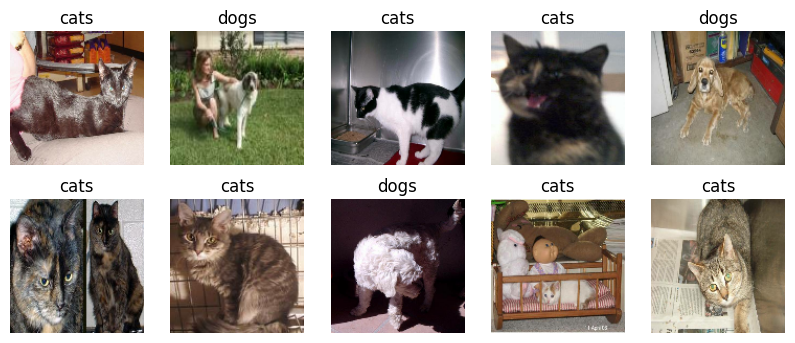

In [9]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [10]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

## Feature Scaling

In [15]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [16]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.26377553 0.21301365 0.11813726]
   [0.5353891  0.38347432 0.20359987]
   [0.5515419  0.38676974 0.19257022]
   ...
   [0.67971814 0.58952206 0.3934436 ]
   [0.6745098  0.58431375 0.3882353 ]
   [0.66332316 0.57312703 0.37704864]]

  [[0.23344655 0.18925542 0.15019915]
   [0.48180148 0.34551165 0.20767464]
   [0.5208326  0.37555075 0.18625896]
   ...
   [0.6862745  0.59607846 0.4       ]
   [0.67977345 0.5895774  0.39349893]
   [0.6684283  0.5782322  0.3821538 ]]

  [[0.22841606 0.19784008 0.19708419]
   [0.3618566  0.26410797 0.1702663 ]
   [0.44014892 0.315451   0.15907294]
   ...
   [0.6901961  0.6        0.40392157]
   [0.68235296 0.5921569  0.39607844]
   [0.66525733 0.57506126 0.37898284]]

  ...

  [[0.7563417  0.70143974 0.5092828 ]
   [0.7183206  0.66341865 0.47126177]
   [0.73020285 0.6753009  0.48314402]
   ...
   [0.4885723  0.440625   0.2917794 ]
   [0.52421874 0.47069523 0.32435638]
   [0.5433364  0.492356   0.3220641 ]]

  [[0.7295343  0.6746324  0.482530

## Data Augmentation

In [13]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

## Model Building

In [17]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

## Model Training

In [20]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 [==============================] - 18s 40ms/step - loss: 0.6828 - accuracy: 0.5825 - val_loss: 0.6707 - val_accuracy: 0.5612
Epoch 2/20
225/225 [==============================] - 10s 42ms/step - loss: 0.6565 - accuracy: 0.6140 - val_loss: 0.6511 - val_accuracy: 0.5800
Epoch 3/20
225/225 [==============================] - 8s 37ms/step - loss: 0.6282 - accuracy: 0.6457 - val_loss: 0.5915 - val_accuracy: 0.6812
Epoch 4/20
225/225 [==============================] - 8s 36ms/step - loss: 0.5977 - accuracy: 0.6774 - val_loss: 0.6123 - val_accuracy: 0.6325
Epoch 5/20
225/225 [==============================] - 10s 44ms/step - loss: 0.5813 - accuracy: 0.6928 - val_loss: 0.5424 - val_accuracy: 0.7425
Epoch 6/20
225/225 [==============================] - 9s 41ms/step - loss: 0.5713 - accuracy: 0.7008 - val_loss: 0.5433 - val_accuracy: 0.7387
Epoch 7/20
225/225 [==============================] - 9s 38ms/step - loss: 0.5416 - accuracy: 0.7249 - val_loss: 0.5491 - val_accuracy: 0.7

In [21]:
history.history

{'loss': [0.6828457713127136,
  0.6565449833869934,
  0.628158450126648,
  0.5977070331573486,
  0.5813098549842834,
  0.5712822079658508,
  0.5416451096534729,
  0.5374325513839722,
  0.5333449244499207,
  0.5169373750686646,
  0.5192316770553589,
  0.500603199005127,
  0.491825670003891,
  0.481656014919281,
  0.4739367365837097,
  0.47036802768707275,
  0.4622018337249756,
  0.4543175995349884,
  0.44599074125289917,
  0.4317808747291565],
 'accuracy': [0.5824999809265137,
  0.6140277981758118,
  0.6456944346427917,
  0.6773611307144165,
  0.6927777528762817,
  0.7008333206176758,
  0.7248610854148865,
  0.7287499904632568,
  0.726527750492096,
  0.742638885974884,
  0.7393055558204651,
  0.7551388740539551,
  0.757777750492096,
  0.7638888955116272,
  0.7695833444595337,
  0.7720833420753479,
  0.7797222137451172,
  0.7827777862548828,
  0.7877777814865112,
  0.7972221970558167],
 'val_loss': [0.6707101464271545,
  0.651135265827179,
  0.5915149450302124,
  0.6122820377349854,
  0.

## Perfomance Analysis

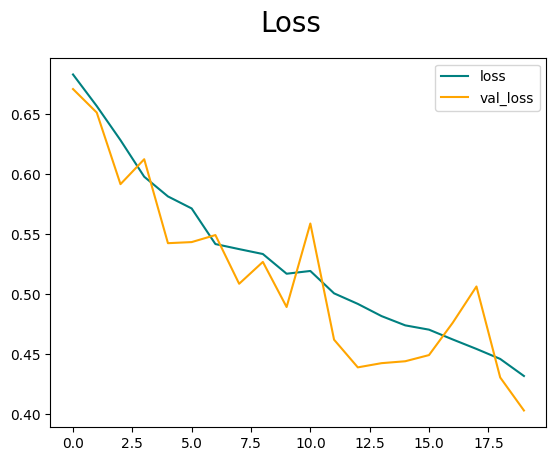

In [22]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()


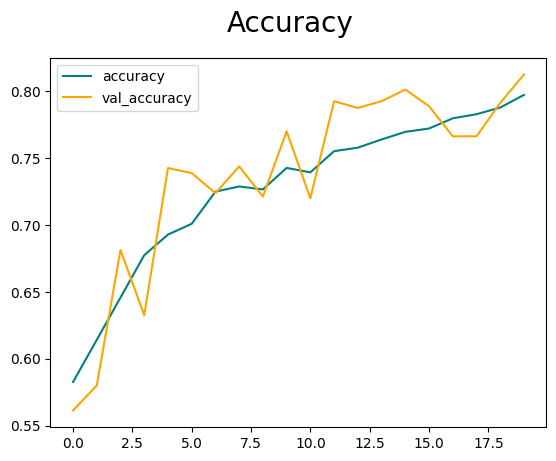

In [23]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

## Model Evaluation

In [24]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()


In [25]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 415ms/step


In [26]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.83554083>

In [27]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.757>

In [28]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.804>

## Test

In [29]:

!pip install opencv-python -q

In [31]:
import cv2

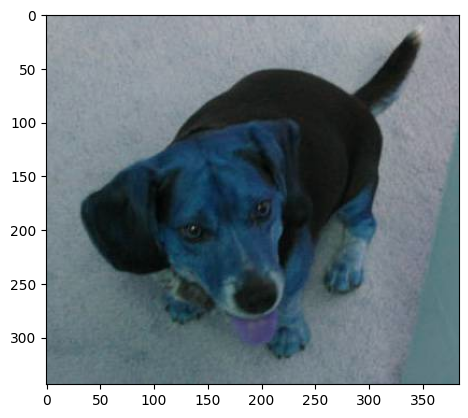

In [40]:
image=cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/dogs/dog.4020.jpg')
plt.imshow(image)
plt.show()

In [41]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [42]:
yhat = model.predict(np.expand_dims(scaled_image, 0))


1/1 [==============================] - 0s 19ms/step


In [43]:
yhat

array([[0.7035857]], dtype=float32)

In [38]:
class_names

['cats', 'dogs']

In [44]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

dogs
